# 주식시장 분석

- 2012-1-1 ~ 2021-12-31 기간의 Tesla, FORD, Apple 의 주가 등락, 변동성, 수익률 비교  


In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## yfinance 를 이용한 주가 data 가져오기

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 7, 31)

tesla_t = yf.Ticker('TSLA')
tesla = tesla_t.history(start=start, end=end)
tesla = tesla[['Close', 'Volume']]
tesla.head(2)

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,1.872000,13921500
2012-01-04 00:00:00-05:00,1.847333,9451500


In [3]:
apple_t = yf.Ticker('AAPL')
apple = apple_t.history(start=start, end=end)
apple = apple[['Close', 'Volume']]
apple.head(2)

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,12.433827,302220800
2012-01-04 00:00:00-05:00,12.500645,260022000


In [4]:
ford_t = yf.Ticker("F")
ford = ford_t.history(start=start, end=end)
ford = ford[['Close', 'Volume']]
ford.head(2)

,Close,Volume
Date,,
2012-01-03 00:00:00-05:00,6.406255,45709900
2012-01-04 00:00:00-05:00,6.504107,79725200


## 주가 추이 시각화

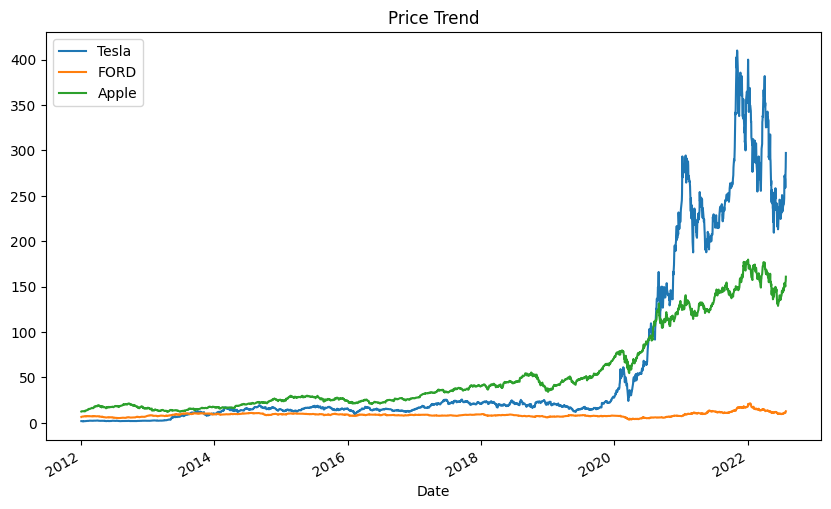

In [26]:
# Tesla, Ford, Apple의 'Close' 가격을 플롯
# 각 종목의 이름을 레이블로 설정
tesla['Close'].plot(label='Tesla', figsize=(10, 6), title="Price Trend")
ford['Close'].plot(label='FORD')
apple['Close'].plot(label='Apple')
plt.legend()

## Log Close Price
- 서로 scale 이 다른 주가에 대한 실제 변화율을 시각화 하기 위해 price 의 log 를 취함

In [28]:
tesla['log close'] = np.log(tesla['Close'])
ford['log close'] = np.log(ford['Close'])
apple['log close'] = np.log(apple['Close'])

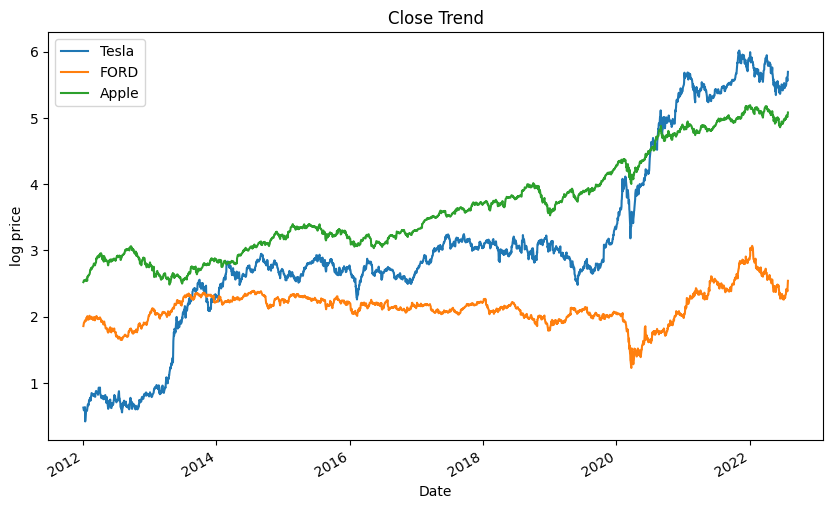

In [29]:
tesla['log close'].plot(label='Tesla', figsize=(10, 6), title="Close Trend")
ford['log close'].plot(label='FORD')
apple['log close'].plot(label='Apple')
plt.ylabel('log price')
plt.legend();

## Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [30]:
tesla['norm close'] = tesla['Close'] / tesla['Close'][0]
ford['norm close'] = ford['Close'] / ford['Close'][0]
apple['norm close'] = apple['Close'] / apple['Close'][0]

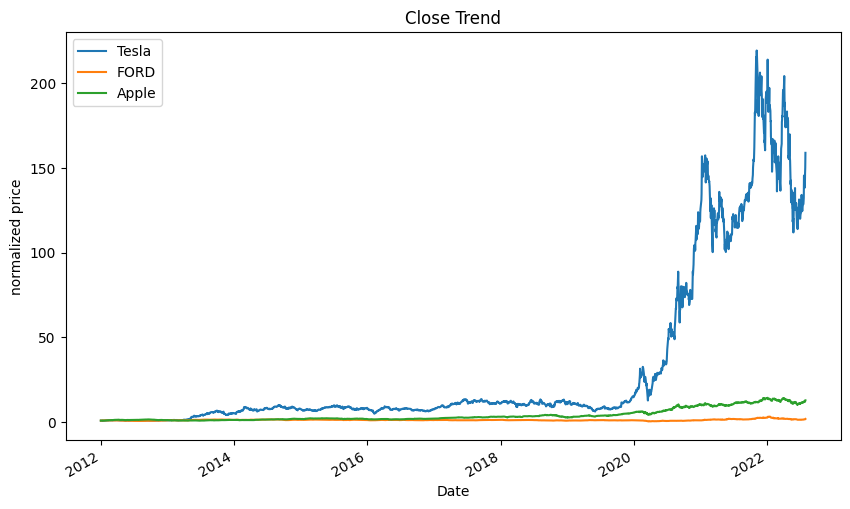

In [31]:
tesla['norm close'].plot(label='Tesla', figsize=(10, 6), title="Close Trend")
ford['norm close'].plot(label='FORD')
apple['norm close'].plot(label='Apple')
plt.ylabel('normalized price')
plt.legend();

## 주식 종목간의 correlation 분석

- Tesla 주식이  Apple 과 관련 있는지, Ford와 관련 있는지 분석

In [32]:
from pandas.plotting import scatter_matrix

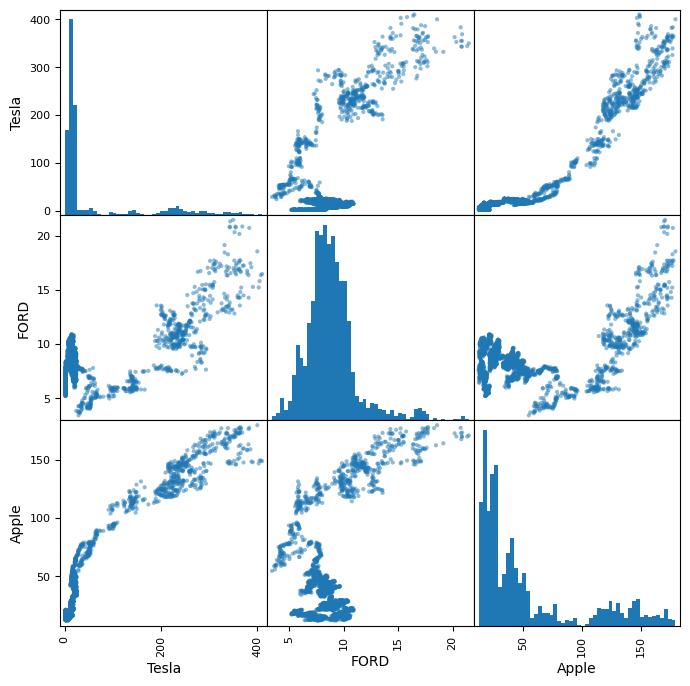

In [33]:
df = pd.concat([tesla['Close'], ford['Close'], apple['Close']], axis=1)
df.columns = ['Tesla', 'FORD', 'Apple']
scatter_matrix(df, figsize=(8, 8), hist_kwds={'bins': 50});

In [13]:
df.corr()

,Tesla,FORD,Apple
Tesla,1.000000,0.645409,0.951569
FORD,0.645409,1.000000,0.495228
Apple,0.951569,0.495228,1.000000


## 일일 수익율 (Daily Percentage Change)

- 주식을 구입하고 다음 날 팔았을 때의 이득 (손실)

- 주식의 변동성 분석에 유용

- 일일 수익율의 분포가 넓으면 변동성 큼

$r_t = \frac{P_t}{P_{t-1}} - 1$

$수익(율) = \frac{당일가격}{전일가격} - 1$

```
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
tesla['return'] = tesla['Close'].pct_change(1)  
```

- histogram 으로 얼마나 넓게 분포하는지 check

In [14]:
tesla['return'] = tesla['Close'] / tesla['Close'].shift(1) - 1
ford['return'] = ford['Close'].pct_change(1)
apple['return'] = apple['Close'].pct_change(1)

히스토그램은 데이터의 분포를 직관적으로 보여주며, 데이터가 특정 범위에 얼마나 자주 나타나는지를 막대의 높이로 나타냅니다.

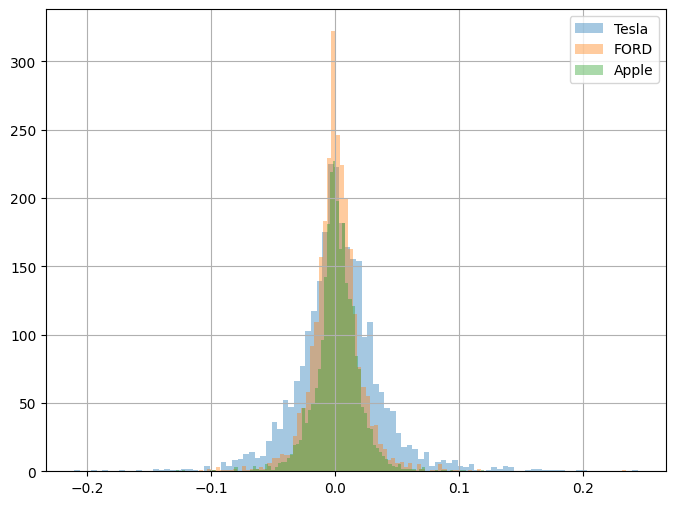

In [15]:
tesla['return'].hist(bins=100, label='Tesla', alpha=0.4, figsize=(8, 6));
ford['return'].hist(bins=100, label='FORD', alpha=0.4);
apple['return'].hist(bins=100, label='Apple', alpha=0.4);
plt.legend();

boxplot은 분포의 중앙값, 사분위값, 이상치 등을 간결하게 요약하여 보여줍니다. 전체 분포보다는 분포의 중심 경향성과 변동성에 초점을 맞춥니다.

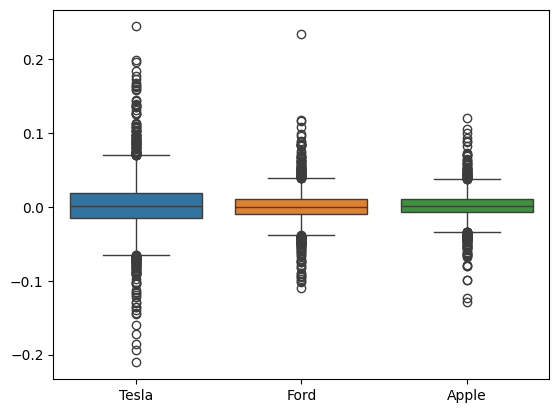

In [17]:
import seaborn as sns

df = pd.concat([tesla['return'], ford['return'], apple['return']], axis=1)
df.columns = ['Tesla', 'Ford', 'Apple']
sns.boxplot(data=df);

## 누적일일수익률 (Cumulative Daily Returns)

- 1 불을 투자했을 때 누적적으로 가장 수익이 많이 났을 주식 파악

$i_t = (1+r_t) * i_{t-1}$  


$누적수익률 = (1 + 당일수익률) * 전일자 누적수익률$

In [18]:
# 투자 기간 동안의 누적 수익률 계산
tesla['cum ret'] = (1 + tesla['return']).cumprod()
ford['cum ret'] = (1 + ford['return']).cumprod()
apple['cum ret'] = (1 + apple['return']).cumprod()

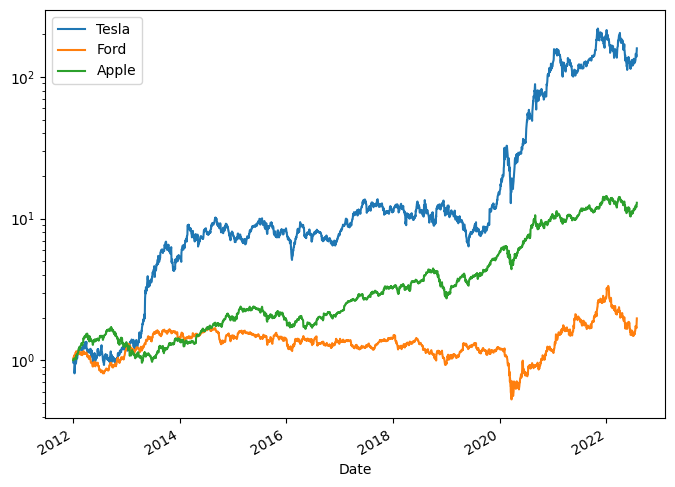

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
tesla['cum ret'].plot(label='Tesla', figsize=(8, 6), ax=ax)
ford['cum ret'].plot(label='Ford', ax=ax)
apple['cum ret'].plot(label='Apple', ax=ax)
plt.legend();

iloc[0]은 DataFrame의 첫 번째 행, -1은 마지막 행. 따라서, tesla.iloc[[0, -1]]는 tesla DataFrame의 첫 번째 행과 마지막 행을 선택하여 반환합니다.

In [20]:
#투자 기간의 시작과 끝에 해당하는 테슬라 주식의 데이터 포인트
tesla.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,1.872000,13921500,0.627007,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,297.149994,95313000,5.694237,158.733973,0.05785,158.733973


In [21]:
#투자 기간의 시작과 끝에 해당하는 애플 주식의 데이터 포인트
apple.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,12.433827,302220800,2.520421,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,160.909927,101786900,5.080845,12.941303,0.032793,12.941303


In [22]:
#투자 기간의 시작과 끝에 해당하는 포드 주식의 데이터 포인트
ford.iloc[[0, -1]]

,Close,Volume,log close,norm close,return,cum ret
Date,,,,,,
2012-01-03 00:00:00-05:00,6.406255,45709900,1.857275,1.000000,NaN,NaN
2022-07-29 00:00:00-04:00,12.684410,94551600,2.540374,1.980004,0.049286,1.980004
